### Like 06_experimental_classifier . . . 

 . . . except that I'm removing four more stopwords, and using tf-idf

In [1]:
import glob

clean_files = sorted(glob.glob('/home/spenteco/Downloads/test_xml/*.xml'))

print(len(clean_files))

37


In [2]:
import re
from lxml import etree
from nltk.corpus import stopwords

sw = set(stopwords.words('french') + ['ici', 'là', 'elles', 'trop', 'tous', 'selon', 'presque', 'tant', 
                                      'fois', 'quant', 'ainsi', 'cette', 'doit', 'tout', 'bien', 'toute', 
                                      'si', 'autre', 'sans', 'comment', 'rien', 'là', 'peu', 'mêmes', 'si', 
                                      'plutôt', 'ceux', 'faire', 'moins', 'être', 'faudra', 
                                      'deux', 'a', 'paris', 'plus', 'où', 'saint', 'cette'])

def is_number(w):

    result = False
    
    try:
        n = int(w)
        result = True
    except ValueError:
        pass
    
    return result

def is_t_valid(t):
    
    terms_to_find= [r'Notre-\s*Dame', 'Cité', 'Saint-\s*Louis', 'Arènes', 
        r'Palais\s*de\s*Justice|Palais-\s*de-\s*Justice',
        'Morgue', r'Sainte-\s*Chapelle', 'Conciergerie', r'[Qq]uai\s*de\s*l\'Horloge', r'Pont-\s*Neuf', r'Cluny|Thermes',
        r'Saint-\s*Germain-\s*des-\s*Prés', 'Nesle', r'[Ss]aint-\s*Sulpice', r'[Pp]alais\s*du\s* Luxembourg', 
        r'[Jj]ardin\s*du\s*Luxembourg', 'Observatoire', r'Panthéon|Sainte-\s*Geneviève', r'[Eéeé]glise\s*Saint-\s*Étienne',
        'Odéon', r'[Jj]ardin\s*des\s*Plantes', 'Gobelins', 'Auxerrois', 'Louvre', r'Carrousel|Doyenné', 'Tuileries', 
        r'Palais-\s*Royal', r'Comédie-\s*Française', 'Bourse', 'Innocents', 'Halles', r'Saint-\s*Eustache', 'Temple',
        r'[Tt]our\s*Saint-\s*Jacques', r'H[oôóòö]tel\s*de\s*Ville|Gr[eêéèë]ve', 'Rivoli', 
        r'Bastille|[Cc]olonne\s*de\s*Juillet', 'Tournelles', r'[Bb]oulevar[dt]\s*de\s*la\s*Madeleine', 'Capucines',
        r'[Bb]oulevard\s*des\s*Italiens', r'[Bb]oulevar[dt]\s*Montmartre', r'[Bb]oulevar[dt]\s*Poissonnière',
        r'[Bb]oulevar[dt]\s*Bonne-\s*Nouvelle', r'[Bb]oulevar[dt]\s*Saint-\s*Denis', r'[Bb]oulevar[dt]\s*Saint-\s*Martin',
        r'[Bb]oulevar[dt]\s*du\s*Temple|[Bb]oulevard\s*du\s*crime', r'[Bb]oulevar[dt]\s*des\s*Filles', 'Beaumarchais',
        r'[Pp]orte\s*Saint-Denis', r'[Cc]afé\s*Tortoni', r'[Cc]afé\s*Anglais', 'Maison-\s*Dorée', 
        r'Notre-\s*Dame-\s*de-\s*Lorette', 'Opéra-\s*[Cc]omique', 'Panorama', 'Opéra', r'[Aa]venue\s*\s*de\s*l’Op[eé]ra',
        r'[Rr]ue\s*de\s*la\s*Paix|[Rr]ue\s*\de\s* Napoléon', 'Vivienne', r'[Rr]ue\s*Saint-\s*Jacques', 
        r'[Rr]ue\s*Saint-\s*Denis', r'[Ff]aubourg\s*Saint-\s*Honoré', r'[Rr]ue\s*du\s*[Ff]aubourg\s*Saint-\s*Antoine',
        r'[Ff]aubourg\s*Saint-\s*Antoine', r'[Pp]lace\s*des\s*Vosges|Place\s*Royale', r'Champs-\s*Elysées', 
        r'Concorde|[Pp]lace\s*Louis[.\s*]XV|obélisque', r'[EÉ]toile|Triomphe', 'Vend[oôóòö]me', r'[Ll]a\s*Madeleine', 
        'Caire', r'des\s*Miracles', r'Quinze-\s*Vingts', r'cimeti[eêéèë]re\s*du\s*P[eêéèë]re-\s*Lachaise,' 
        r'[Bb]utte\s*Montmartre', r'Montfaucon|[Vv]oierie', 'Chaumont', r'[Cc]h[aâáàä]teau\s*de\s*Vincennes', 'Invalides',
        r'[Eéeé]cole\s*Militaire|Champ-\s*de-\s*Mars', 'Grenelle']   
    
    result = False
    
    if t > '':
        
        was_matched = False
        for term in terms_to_find:
        
            for match in re.finditer(term, t, flags=re.IGNORECASE):
                was_matched = True
                
            if was_matched == True:
                break
        
        if was_matched == False and is_number(t) == False:
            result = True
        
    return result

def tokenize_text(text):
    
    clean_text = re.sub(r'[^\s0123456789abcdefghijklmnopqrstuvwxyzàâäæçèéêëîïñôùûüÿœ̀]',
                       ' ',
                       text.lower())
    clean_text = re.sub('\s+', ' ', clean_text)
    
    return [t for t in clean_text.lower().split(' ') if is_t_valid(t) and t not in sw]

# ----------------------------------------------------------------------------------------

good_text = []
bad_text = []

for a in clean_files:
    
    print(a)
    
    tree = etree.parse(a)
    
    for node in tree.xpath('//snippet'):
        if node.get('quality') != None and node.get('quality') == 'good':
            good_text.append(tokenize_text(node.text))
        elif node.get('confirmed') != None and node.get('confirmed') == 'yes':
            good_text.append(tokenize_text(node.text))
        elif node.get('classifier_result') != None and node.get('classifier_result') == 'good':
            pass
        else:
            bad_text.append(tokenize_text(node.text))
    
print()
print('len(good_text)', len(good_text), 
      'len(bad_text)', len(bad_text))

/home/spenteco/Downloads/test_xml/About_1861_bpt6k64392756_test.xml
/home/spenteco/Downloads/test_xml/Abrantès_1844_bpt6k6472523f_test.xml
/home/spenteco/Downloads/test_xml/Achard_1860_bpt6k113880g_test.xml
/home/spenteco/Downloads/test_xml/Amigues_1871_bpt6k54697084_test.xml
/home/spenteco/Downloads/test_xml/Asti_1843_bpt6k6471672z_test.xml
/home/spenteco/Downloads/test_xml/Auberive_1860_bpt6k6394066d_test.xml
/home/spenteco/Downloads/test_xml/Balleydier_1849_bpt6k105490w_test.xml
/home/spenteco/Downloads/test_xml/Balzac_1841_bpt6k1133819_test.xml
/home/spenteco/Downloads/test_xml/Bamboches_amoureuses_1840_bpt6k1164416j_test.xml
/home/spenteco/Downloads/test_xml/Banville_1866_bpt6k205836j_test.xml
/home/spenteco/Downloads/test_xml/Becker_1837_bpt6k105479m_test.xml
/home/spenteco/Downloads/test_xml/Bellet_1857_bpt6k6456840p_test.xml
/home/spenteco/Downloads/test_xml/Bonneville_1830_bpt6k5530903c_test.xml
/home/spenteco/Downloads/test_xml/Bréauté_1845_bpt6k64714083_test.xml
/home/spe

In [3]:
print(good_text[0])

['st', 'temps', 'excès', 'faiblesse', 'quelques', 'lignes', 'venons', 'écrire', 'histoire', 'politique', 'capitale', 'état', 'institutions', 'habitudes', 'individualités', 'actives', 'brouillonnes', 'sollicite', 'appétit', 'pouvoir', 'désir', 'produire', 'trouvant', 'point', 'vie', 'politique', 'dela', 'province', 'aliment', 'ieur', 'suffise', 'ruent', 'toutes', 'parts', 'vers', 'bousculent', 'étouffent', 'sous', 'âpre', 'aiguillon', 'concurrence', 'effrénée', 'accueillies', 'perdues', 'immense', 'population', 'pullulent', 'éléments', 'trouble', 'désordre', 'chaleur', 'milieu', 'social', 'terrible', 'séduction', 'exercent', 'nombreux', 'exemples', 'fortunes', 'politiques', 'faites', 'jour', 'parles', 'voies', 'émeute', 'scandale', 'contacts', 'violents', 'facilités', 'malsaines', 'naissent', 'périodiquement', 'bouleversements', 'politiques', 'quinze', 'dix', 'huit', 'ans', 'tête', 'pont', 'place', 'occupée', 'enlevée', 'quelques', 'milliers', 'hommes', 'mènent', 'poussent', 'centaine',

In [4]:
import random, pickle
from gensim import corpora, matutils, models
import time
from sklearn.naive_bayes import *
from sklearn import tree, svm
from sklearn.linear_model import *
from sklearn.ensemble import *
    
def report_results(testing_labels, predicted, n_try, classifier):
    
    testing_counts = {}
    for l in testing_labels:
        if l not in testing_counts:
            testing_counts[l] = 0
        testing_counts[l] += 1
    
    results = {}

    for a in range(0, len(testing_labels)):
        k = testing_labels[a] + ' ' + predicted[a]
        if k not in results:
            results[k] = 0
        results[k] += 1
    
    final_results = {'n_try': n_try, 'classifier': classifier}
    
    #print()
    for k, v in results.items():
    #    print('\t', k, v, (v / testing_counts[k.split(' ')[0]]))
        final_results[k + ' n'] = v
        final_results[k + ' pct'] = (v / testing_counts[k.split(' ')[0]])
    #print()
    
    return final_results


# -----------------------------------------------------------------------------

all_final_results = []

for n_try in range(0, 20):
    
    print('\t', 'n_try', n_try)

    # -----------------------------------------------------------------------------

    random.shuffle(good_text)
    random.shuffle(bad_text)

    training_data = [['good', text] for text in good_text[:int(len(good_text) * 0.8)]] + \
                    [['bad', text] for text in bad_text[:int(len(bad_text) * 0.8)]]

    testing_data = [['good', text] for text in good_text[int(len(good_text) * 0.8):]] + \
                    [['bad', text] for text in bad_text[int(len(bad_text) * 0.8):]]
    
    # -----------------------------------------------------------------------------

    dictionary = corpora.Dictionary([text[1] for text in training_data] + \
                                    [text[1] for text in testing_data])

    training_labels = [text[0] for text in training_data]
    training_corpus = [dictionary.doc2bow(text[1]) for text in training_data]
    
    training_model = models.TfidfModel(training_corpus)
    training_vector = training_model[training_corpus]
    
    training_matrix = matutils.corpus2dense(training_vector, len(dictionary))
    training_matrix = training_matrix.T

    testing_labels = [text[0] for text in testing_data]
    testing_corpus = [dictionary.doc2bow(text[1]) for text in testing_data]
    
    testing_model = models.TfidfModel(testing_corpus)
    testing_vector = testing_model[testing_corpus]

    testing_matrix = matutils.corpus2dense(testing_vector, len(dictionary))
    testing_matrix = testing_matrix.T

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('bnb', BernoulliNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (1)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (1)'))

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('mnb', MultinomialNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (2)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (2)'))

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('bnb', BernoulliNB(fit_prior=False)),
        ('mnb', MultinomialNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (3)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (3)'))

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('bnb', BernoulliNB(fit_prior=False)),
        ('mnb', MultinomialNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='hard')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (4)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (4)'))

    # -----------------------------------------------------------------------------

    # MAKE NO DIFFERENCE
    
    start_time = time.time()

    estimators = [
        ('bnb', MultinomialNB(fit_prior=True)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (5)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (5)'))

    # -----------------------------------------------------------------------------

    # MAKE NO DIFFERENCE

    start_time = time.time()

    estimators = [
        ('bnb', MultinomialNB(fit_prior=True)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='hard')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (6)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (6)'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = RandomForestClassifier().fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('RandomForestClassifier', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'RandomForestClassifier'))

    # -----------------------------------------------------------------------

    # MAKE NO DIFFERENCE

    start_time = time.time()

    clf = BernoulliNB(fit_prior=True).fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('BernoulliNB True', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'BernoulliNB True'))

    # -----------------------------------------------------------------------

    # MAKE NO DIFFERENCE

    start_time = time.time()

    clf = MultinomialNB(fit_prior=True).fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('MultinomialNB True', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'MultinomialNB True'))

    # -----------------------------------------------------------------------


    start_time = time.time()

    clf = BernoulliNB(fit_prior=False).fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('BernoulliNB False', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'BernoulliNB False'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = MultinomialNB(fit_prior=False).fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('MultinomialNB False', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'MultinomialNB False'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('DecisionTreeClassifier', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'DecisionTreeClassifier'))

    # -----------------------------------------------------------------------

    # QUITE SLOW: ~60 SECONDS TO RUN.  GOOD AT AVOIDING FALSE 'GOOD'; BUT BAD AT TRUE 'GOOD'
    
    start_time = time.time()

    clf = svm.SVC()
    clf = clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('SVC', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'SVC'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = SGDClassifier()
    clf = clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('SGDClassifier', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'SGDClassifier'))

    # -----------------------------------------------------------------------


	 n_try 0
VotingClassifier (1) score 0.9007633587786259 17.967166423797607
VotingClassifier (2) score 0.8740458015267175 12.336930513381958
VotingClassifier (3) score 0.8950381679389313 20.25170660018921
VotingClassifier (4) score 0.8893129770992366 20.537557125091553
VotingClassifier (5) score 0.8740458015267175 12.624829530715942
VotingClassifier (6) score 0.8740458015267175 11.422676801681519
RandomForestClassifier score 0.8893129770992366 9.08941125869751
BernoulliNB True score 0.9007633587786259 9.197927236557007
MultinomialNB True score 0.8740458015267175 3.6589760780334473
BernoulliNB False score 0.898854961832061 9.23673701286316
MultinomialNB False score 0.8740458015267175 3.9958336353302
DecisionTreeClassifier score 0.8530534351145038 14.207819700241089
SVC score 0.8835877862595419 564.6703662872314
SGDClassifier score 0.898854961832061 11.68033504486084
	 n_try 1
VotingClassifier (1) score 0.8912213740458015 17.961177110671997
VotingClassifier (2) score 0.8778625954198473 12

VotingClassifier (5) score 0.8740458015267175 12.960808753967285
VotingClassifier (6) score 0.8740458015267175 12.752513647079468
RandomForestClassifier score 0.9083969465648855 9.136684894561768
BernoulliNB True score 0.9103053435114504 10.629605531692505
MultinomialNB True score 0.8740458015267175 4.957553863525391
BernoulliNB False score 0.9103053435114504 12.330290794372559
MultinomialNB False score 0.8740458015267175 4.113749980926514
DecisionTreeClassifier score 0.898854961832061 15.529905557632446
SVC score 0.9103053435114504 591.3032102584839
SGDClassifier score 0.9122137404580153 12.31949758529663
	 n_try 10
VotingClassifier (1) score 0.9007633587786259 16.434431076049805
VotingClassifier (2) score 0.8759541984732825 14.568653583526611
VotingClassifier (3) score 0.9007633587786259 42.24038577079773
VotingClassifier (4) score 0.8912213740458015 41.0185866355896
VotingClassifier (5) score 0.8759541984732825 16.64864182472229
VotingClassifier (6) score 0.8740458015267175 18.96505

MultinomialNB True score 0.8740458015267175 2.609689712524414
BernoulliNB False score 0.8912213740458015 6.841958045959473
MultinomialNB False score 0.8721374045801527 2.6602375507354736
DecisionTreeClassifier score 0.8759541984732825 15.13482141494751
SVC score 0.9064885496183206 517.1360149383545
SGDClassifier score 0.9236641221374046 7.887597560882568
	 n_try 19
VotingClassifier (1) score 0.8950381679389313 18.234127283096313
VotingClassifier (2) score 0.8740458015267175 12.428583145141602
VotingClassifier (3) score 0.8893129770992366 22.856786966323853
VotingClassifier (4) score 0.8835877862595419 21.56219506263733
VotingClassifier (5) score 0.8740458015267175 11.810694217681885
VotingClassifier (6) score 0.8740458015267175 11.903042554855347
RandomForestClassifier score 0.8893129770992366 7.7613654136657715
BernoulliNB True score 0.8931297709923665 9.412373304367065
MultinomialNB True score 0.8740458015267175 4.189069986343384
BernoulliNB False score 0.8950381679389313 9.339436531

In [5]:
print(len(all_final_results))
print(all_final_results[0])

for a in range(0, len(all_final_results)):
    
    for x in ['good', 'bad']:
        for y in ['good', 'bad']:
    
            k1 = x + ' ' + y + ' n'
            k2 = x + ' ' + y + ' pct'
    
            if k1 not in all_final_results[a]:
                all_final_results[a][k1] = 0

            if k2 not in all_final_results[a]:
                all_final_results[a]['bad good pct'] = 0.0

280
{'n_try': 0, 'classifier': 'VotingClassifier (1)', 'good bad n': 45, 'good bad pct': 0.6818181818181818, 'good good n': 21, 'good good pct': 0.3181818181818182, 'bad bad n': 451, 'bad bad pct': 0.9847161572052402, 'bad good n': 7, 'bad good pct': 0.015283842794759825}


In [6]:
import pandas as pd

df = pd.DataFrame(all_final_results)
df.to_csv('07_classifier_comparison.csv', index=False)

print('ok')

ok


BernoulliNB False mean bad good n (x) 6.25
BernoulliNB False mean good good n (y) 19.85
BernoulliNB False good good / bad good n ratio 3.176


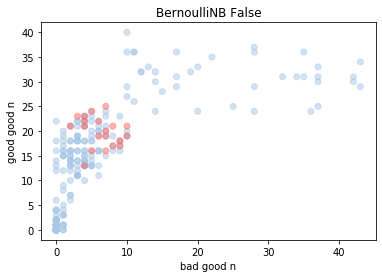

BernoulliNB True mean bad good n (x) 5.95
BernoulliNB True mean good good n (y) 19.25
BernoulliNB True good good / bad good n ratio 3.235294117647059


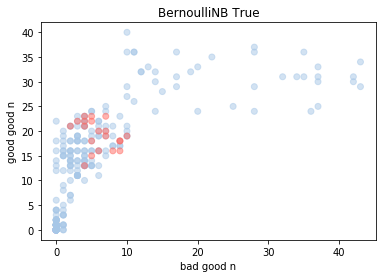

DecisionTreeClassifier mean bad good n (x) 33.35
DecisionTreeClassifier mean good good n (y) 30.2
DecisionTreeClassifier good good / bad good n ratio 0.9055472263868065


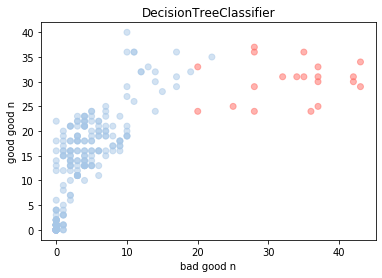

MultinomialNB False mean bad good n (x) 0.15
MultinomialNB False mean good good n (y) 0.65
MultinomialNB False good good / bad good n ratio 4.333333333333334


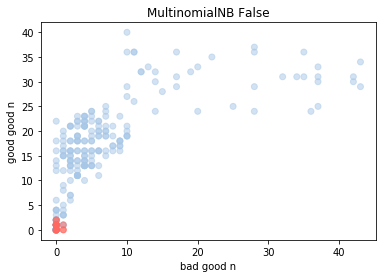

MultinomialNB True mean bad good n (x) 0
MultinomialNB True mean good good n (y) 0


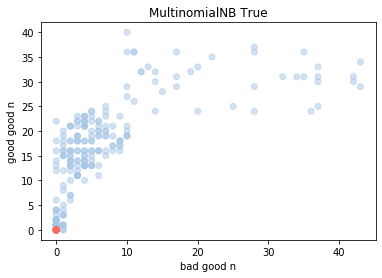

RandomForestClassifier mean bad good n (x) 3.85
RandomForestClassifier mean good good n (y) 15.4
RandomForestClassifier good good / bad good n ratio 4.0


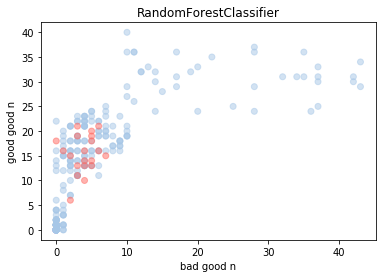

SGDClassifier mean bad good n (x) 13.4
SGDClassifier mean good good n (y) 31.35
SGDClassifier good good / bad good n ratio 2.3395522388059704


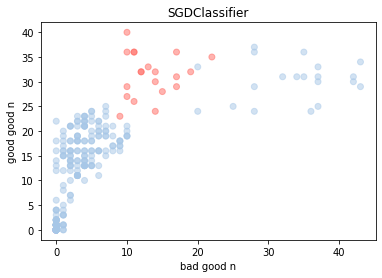

SVC mean bad good n (x) 2.3
SVC mean good good n (y) 15.45
SVC good good / bad good n ratio 6.717391304347826


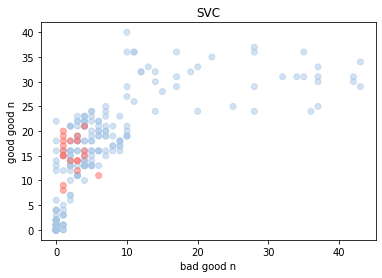

VotingClassifier (1) mean bad good n (x) 5.85
VotingClassifier (1) mean good good n (y) 19.7
VotingClassifier (1) good good / bad good n ratio 3.3675213675213675


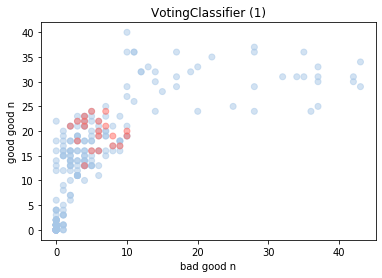

VotingClassifier (2) mean bad good n (x) 0.35
VotingClassifier (2) mean good good n (y) 2.7
VotingClassifier (2) good good / bad good n ratio 7.714285714285715


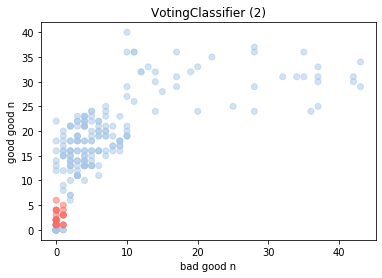

VotingClassifier (3) mean bad good n (x) 2.85
VotingClassifier (3) mean good good n (y) 15.35
VotingClassifier (3) good good / bad good n ratio 5.385964912280701


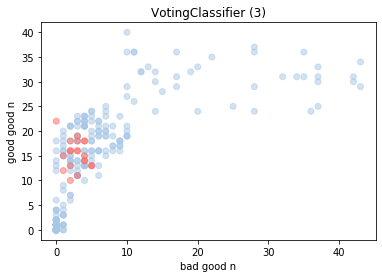

VotingClassifier (4) mean bad good n (x) 2.2
VotingClassifier (4) mean good good n (y) 12.45
VotingClassifier (4) good good / bad good n ratio 5.659090909090908


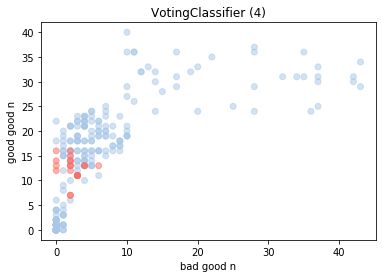

VotingClassifier (5) mean bad good n (x) 0
VotingClassifier (5) mean good good n (y) 0.65


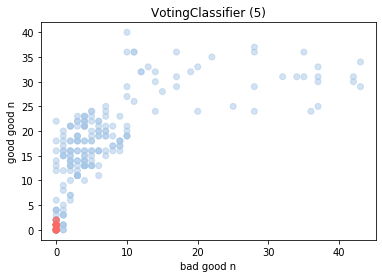

VotingClassifier (6) mean bad good n (x) 0
VotingClassifier (6) mean good good n (y) 0


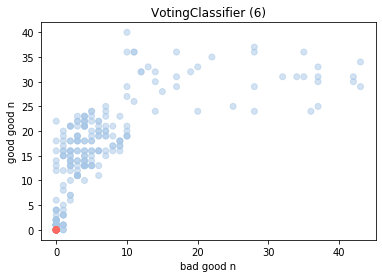

In [7]:
%matplotlib inline
import statistics
import matplotlib.pyplot as plt

classifier_names = []
for r in all_final_results:
    classifier_names.append(r['classifier'])

classifier_names = sorted(list(set(classifier_names)))

mean_data = []

for classifier_name in classifier_names:
    
    x = []
    y = []
    c = []
    
    match_x = []
    match_y = []
    
    for r in all_final_results:
        
        if r['classifier'] == classifier_name:
            pass
        else:
            x.append(r['bad good n'])
            y.append(r['good good n'])
            c.append('#A7C7E7')
    
    for r in all_final_results:
        
        if r['classifier'] == classifier_name:
            x.append(r['bad good n'])
            y.append(r['good good n'])
            match_x.append(r['bad good n'])
            match_y.append(r['good good n'])
            c.append('#ff6961')
        else:
            pass
        
    print(classifier_name, 'mean bad good n (x)', statistics.mean(match_x))
    print(classifier_name, 'mean good good n (y)', statistics.mean(match_y))
    if statistics.mean(match_x) > 0:
        print(classifier_name, 'good good / bad good n ratio', 
              (statistics.mean(match_y) / statistics.mean(match_x)))
        
    ratio = 999
    if statistics.mean(match_x) > 0: 
        ratio = (statistics.mean(match_y) / statistics.mean(match_x))
        
    mean_data.append({'run': '07', 'classifier_name': classifier_name, 
                          'false positive n': statistics.mean(match_x), 
                          'true positive n': statistics.mean(match_y),
                          'n true positive to false positive': ratio})
        
    plt.scatter(x, y, c=c, alpha=0.5)
    plt.title(classifier_name)
    plt.xlabel('bad good n')
    plt.ylabel('good good n')
    
    plt.show()
    

In [8]:
import re, json

#print(re.sub('\}, ', '},\n', str(mean_data)) + ' \\ +')

f = open('07_mean_data.json', 'w', encoding='utf-8')
f.write(json.dumps(mean_data, indent=4))
f.close()

print('ok')

ok
